# **Pre Processing and  Data Splitting**

In [1]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns  # For data visualization (especially heatmaps and scatter plots)
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets

In [2]:
# Load dataset
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Check for duplicates
print("\nDuplicated rows:")
print(df.duplicated().sum())

# Remove duplicates (if any)
df= df.drop_duplicates()

# Show statistical summary of the dataset
print("\nData Statistics:")
print(df.describe())

Missing values:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Duplicated rows:
0

Data Statistics:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [6]:
# Convert the 'Gender' column to categorical codes (Female=0, Male=1)
# Convert to categorical and get codes
df['Gender_Code'] = df['Gender'].astype('category').cat.codes

# Note: This assigns codes alphabetically (Female=0, Male=1)

# Display original and encoded 'Gender' values
print(df[['Gender', 'Gender_Code']].head())

   Gender  Gender_Code
0    Male            1
1    Male            1
2  Female            0
3  Female            0
4    Male            1


In [7]:
# Drop the original 'Gender' , User ID columns from the DataFrame
df = df.drop(['Gender','User ID'], axis=1)

In [8]:
df.sample(10)

,Age,EstimatedSalary,Purchased,Gender_Code
362,47,50000,1,0
135,23,63000,0,1
5,27,58000,0,1
91,30,116000,0,0
348,39,77000,0,1
217,40,78000,0,1
221,35,91000,1,1
115,40,57000,0,1
63,32,120000,1,1
172,26,118000,0,0


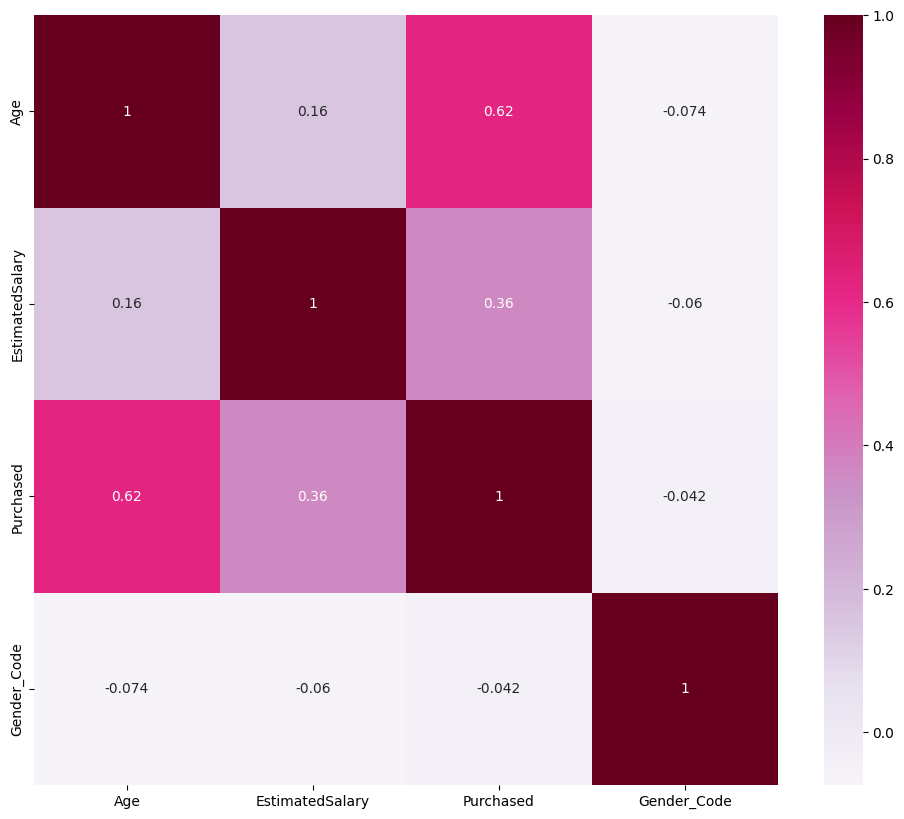

In [9]:
# Compute correlation matrix for all numerical features
corr_matrix = df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd')
plt.show()

In [10]:
#Select feature and target
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [11]:
# 60% train,40% temporary (will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# Split the temporary set into 50% validation set and 50% test set (each 20% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# **K-Nearest Neighbors (KNN) Algorithm**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = list(range(1, 10))
val_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
for k, acc in zip(k_values, val_accuracies):
    print(f"K={k}, Validation Accuracy={acc:.4f}")
best_k = k_values[val_accuracies.index(max(val_accuracies))]
print(f"\nBest K value: {best_k}")

K=1, Validation Accuracy=0.8875
K=2, Validation Accuracy=0.8875
K=3, Validation Accuracy=0.8750
K=4, Validation Accuracy=0.9000
K=5, Validation Accuracy=0.9000
K=6, Validation Accuracy=0.9125
K=7, Validation Accuracy=0.9125
K=8, Validation Accuracy=0.9125
K=9, Validation Accuracy=0.9000

Best K value: 6


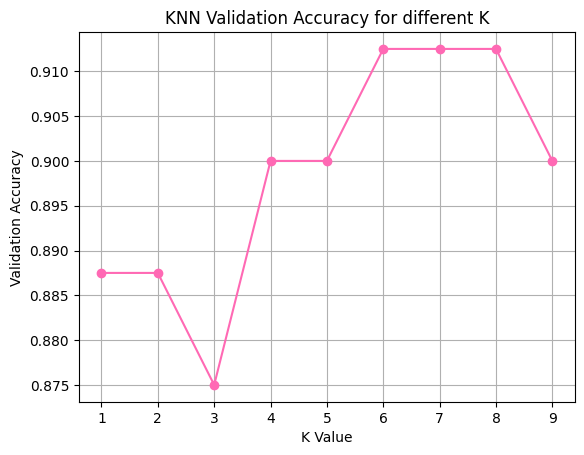

In [14]:
plt.plot(k_values, val_accuracies, marker='o',color='hotpink')
plt.xlabel('K Value')
plt.ylabel('Validation Accuracy')
plt.title('KNN Validation Accuracy for different K')
plt.grid()
plt.show()


In [15]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_test_pred = final_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Accuracy: 0.9250


In [16]:
train_accuracy = accuracy_score(y_train, final_knn.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, final_knn.predict(X_val_scaled))

In [17]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Train Accuracy: 0.9125
Validation Accuracy: 0.9125


# **Cross-Validation**

In [18]:
from sklearn.model_selection import cross_val_score, KFold

# Define the final model with the best K
final_knn_cv = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# Setup 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(final_knn_cv, X_train_scaled, y_train, cv=kf)

# Results
print(f"Cross-Validation Accuracies for each fold: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracies for each fold: [0.83333333 0.875      0.95833333 0.83333333 0.83333333 0.83333333
 0.91666667 0.875      0.875      0.95833333]
Average Cross-Validation Accuracy: 0.8792


# **Confusion Matrix**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

In [20]:
y_pred = final_knn.predict(X_test_scaled)

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Metrics
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=['Class 0','Class 1']))

Accuracy : 0.9250
Precision: 0.8919
Recall   : 0.9429
F1-score : 0.9167

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.91      0.93        45
     Class 1       0.89      0.94      0.92        35

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



# **Overfitting and Model Improvement**

### Is there Overfitting?
* Training Accuracy: 91.25%  
* Validation Accuracy: 91.25%  
* Test Accuracy: 92.50%  
* The difference between training and test accuracies is only 1.25%, which is very small.
* Average cross-validation accuracy: 87.92%, slightly lower than the train/test accuracies, reflecting normal variability across folds.
* Overall, the model shows **no significant overfitting** in the model.


Even though overfitting is not a problem here, Let's try increasing K to 9 and check if the test accuracy improves or remains stable.

#### Why increasing K can improve the model ?
* In K-Nearest Neighbors (KNN), a small K value makes the model highly
sensitive to noise and outliers, which can cause overfitting but a higher K value means the model considers more neighbors before making a decision.
* This results in smoother decision boundaries and reduces the effect of noisy data points.

In [22]:
# Trying a higher value of K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

higher_k = 9
knn_higher_k = KNeighborsClassifier(n_neighbors=higher_k, weights='distance')
knn_higher_k.fit(X_train_scaled, y_train)

y_test_pred_higher_k = knn_higher_k.predict(X_test_scaled)
test_acc_higher_k = accuracy_score(y_test, y_test_pred_higher_k)

print(f"Test Accuracy with K= 9 : {test_acc_higher_k:.4f}")

Test Accuracy with K= 9 : 0.9250


### Result after Increasing K (from 6 to 9)
* Test Accuracy with K=6: 92.50%  
* Test Accuracy with K=9: 92.50%  
* The accuracy remained **stable** when increasing K from 6 to 9, indicating that a larger neighborhood did not degrade performance.
* This stability confirms that the model generalizes well and is not overfitting.

# **Visualization**

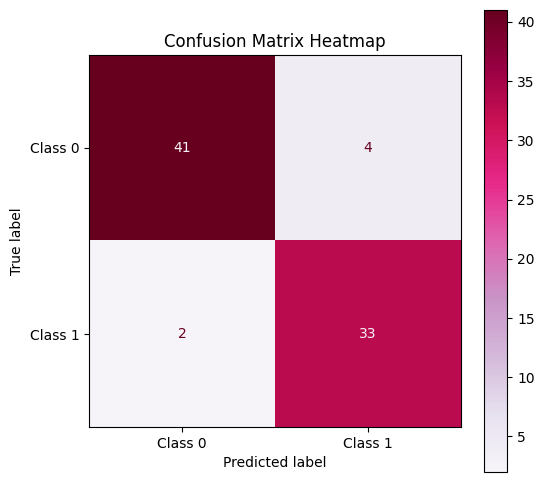

In [29]:
# Confusion Matrix Heatmap
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap='PuRd', ax=ax, colorbar=True)
plt.title('Confusion Matrix Heatmap')
plt.show()

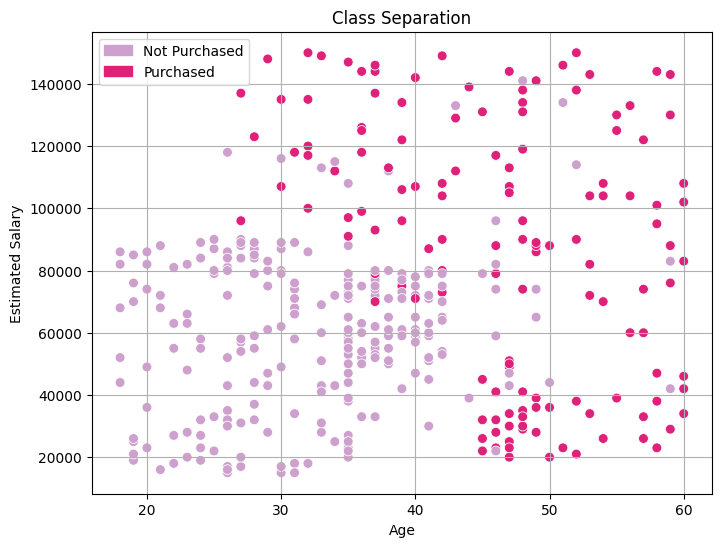

In [34]:
# 2D Visualization of the Dataset (Scatter plot)
import matplotlib.patches as mpatches

col = sns.color_palette("PuRd", 2)

plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    x=df['Age'],
    y=df['EstimatedSalary'],
    hue=df['Purchased'],
    palette=col,
    s=50
)
plt.title('Class Separation')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Manually create two Patch objects then pass them to the legend
patch0 = mpatches.Patch(color=col[0], label='Not Purchased')
patch1 = mpatches.Patch(color=col[1], label='Purchased')
plt.legend(handles=[patch0, patch1])

plt.grid(True)
plt.show()